In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid as trap
import matplotlib.pyplot as plt
from peakutils import indexes
import pencil as pc
from IPython.display import display, Latex
import modes

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
# plt.rcParams.update({'font.size': 16})
# plt.rcParams['text.usetex'] = True

In [3]:
sim = pc.get_sim(quiet=True)
# #reading timeseries data
ts = pc.read.ts()

Read 33395 lines.


In [4]:
xyaver = pc.read.aver(plane_list=['xy'])

In [5]:
yaver = pc.read.aver(plane_list='y')

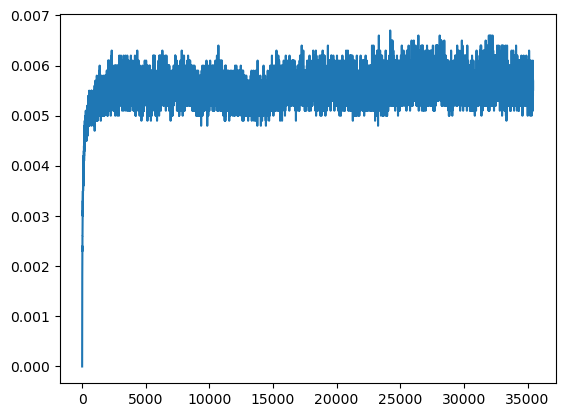

In [6]:
plt.plot(ts.t, ts.urms)

In [7]:
sim.get_extent()

[-12.566369974975586, 12.566369974975586, -12.56637, 12.56637]

In [8]:
# var = pc.read.var(trimall=True)

In [9]:
xyaver.xy.keys

['rhomz', 'TTmz', 'ppmz', 'ssmz', 't']

In [10]:
mode = modes.Modes(sim, ts, xyaver, yaver, ini=False, dyn=False)

## Variation of Thermodynamic Variables along z

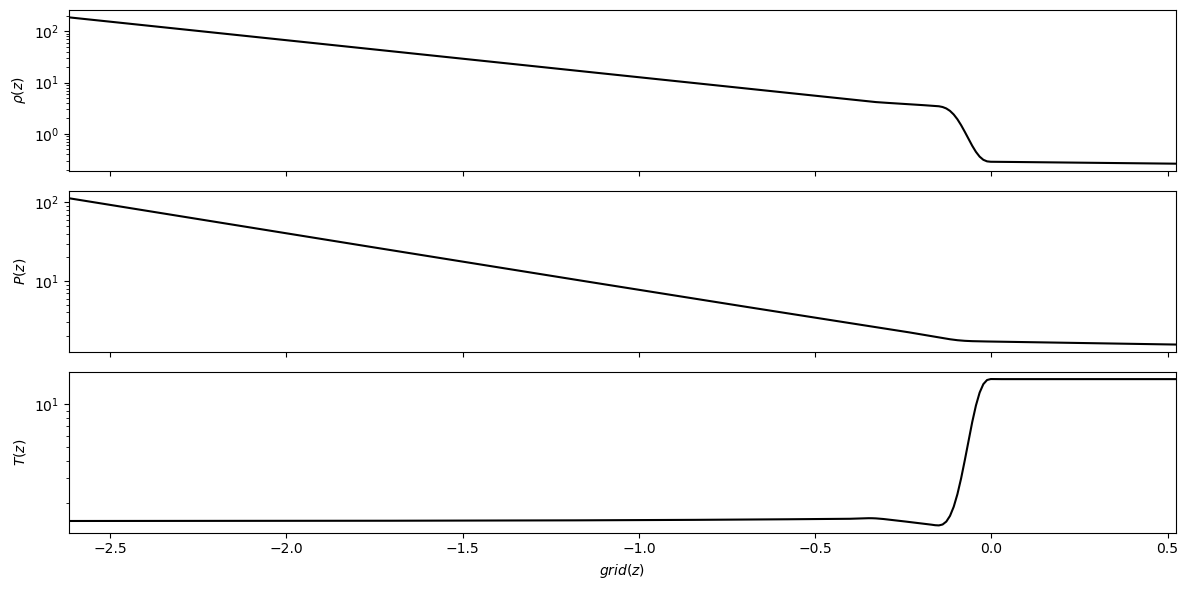

In [11]:
fig, axs = plt.subplots(3,1, figsize=(12,6), sharex=True)

axs[0].plot(mode.z, mode.rho, color='k')
# axs[0].plot(data[:,0], np.exp(data[:,1]), color='k', ls=':')
# axs[1].plot(grid.z, pressure, color='k')
axs[1].plot(mode.z, mode.pre, color='k')
axs[2].plot(mode.z, mode.tem, color='k')
#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

# axs[0].set_xlim(z[0], z[-1])
# axs[1].set_xlim(z[0], z[-1])
axs[2].set_xlim(mode.z[0], mode.z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

# xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# axs[2].set_xticks(xticks)
# axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
#                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
plt.xlabel(r"$grid (z)$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [12]:
mode.L0

1.012

In [13]:
mode.cs_u

3.163

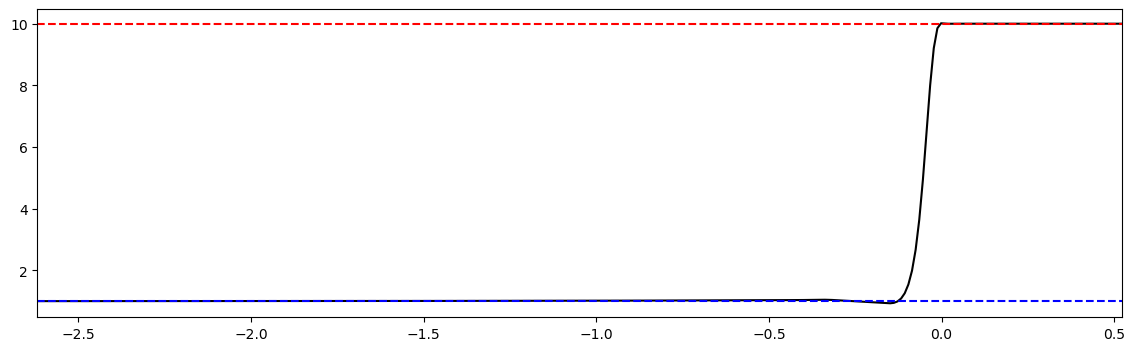

In [14]:
cs = mode.gamma*mode.pre/mode.rho
fig = plt.figure(figsize=(14,4))
plt.plot(mode.z, cs, c='k')
plt.plot(mode.z, mode.cs_u**2*np.ones(len(mode.z)), c='r', ls='--')
plt.plot(mode.z, mode.cs_d**2*np.ones(len(mode.z)), c='b', ls='--')
plt.xlim(mode.z[0], mode.z[-1])
plt.show()

In [15]:
# fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)

# axs[0].plot(mode.z, mode.bxmz, color='k')
# # axs[0].plot(mode.z, bxmz, color='k')
# # axs[0].plot(data[:,0], np.exp(data[:,1]), color='k', ls=':')
# # axs[1].plot(grid.z, pressure, color='k')
# axs[1].plot(mode.z, mode.bymz, color='k')
# # axs[1].plot(mode.z, bymz, color='k')
# #axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

# # axs[0].set_yscale("log")
# # axs[1].set_yscale("log")

# # axs[0].set_xlim(z[0], z[-1])
# # axs[1].set_xlim(z[0], z[-1])
# axs[1].set_xlim(mode.z[0], mode.z[-1])

# axs[0].set_ylabel(r"$\langle B_x\rangle_{xy}(z)$")
# axs[1].set_ylabel(r"$\langle B_y\rangle_{xy}(z)$")

# # xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# # axs[2].set_xticks(xticks)
# # axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
# #                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
# plt.xlabel(r"$grid (z)$")
# plt.tight_layout()
# #plt.savefig("variation.jpg")

In [16]:
# bxmz = xyaver.xy.bxmz[-100,:]
# bymz = xyaver.xy.bymz[-100,:]

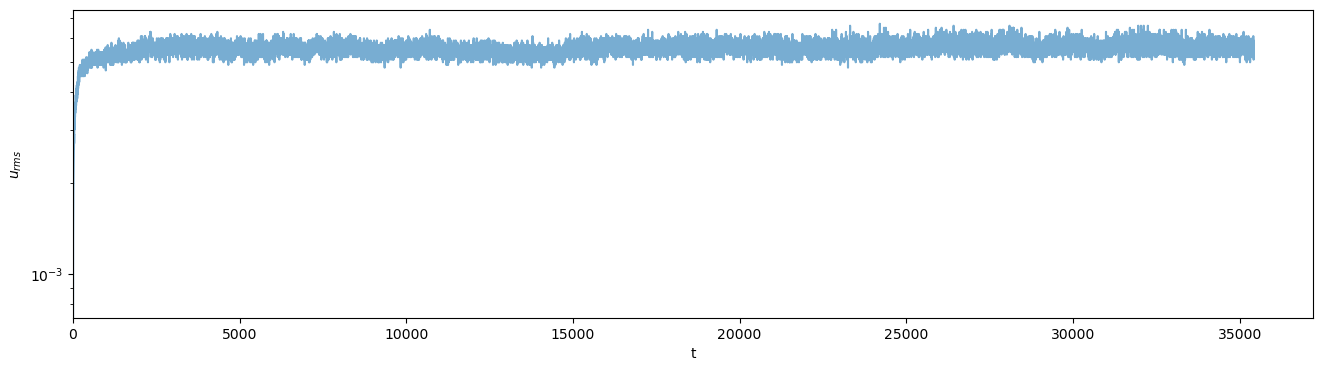

In [17]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [18]:
# fig = plt.figure(figsize=(16,4))
# plt.semilogy(ts.t, ts.brms, alpha=0.6)
# # plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
# # plt.axvline(x=tt[kin_t_d])
# # plt.axvline(x=tt[kin_t_u])
# #plt.plot(t_fit, u_fit, '--r')
# plt.yscale('log')
# plt.xlim(0,)
# plt.xlabel("t")
# plt.ylabel(r"$b_{rms}$")
# plt.show()

## using total data

In [19]:
uz_real = yaver.y.uzmxz

In [20]:
uz_real.shape

(1772, 1024, 300)

In [21]:
uz_real[:,:3,3].shape

(1772, 3)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

In [22]:
indx_t1 = np.argmin(np.abs(yaver.t - 2000))  #to avoid the transient effects below t=170
indx_t2 = np.argmin(np.abs(yaver.t - 60000))

In [23]:
mode.indx_zref #, 256*9

249

In [24]:
indx_t1, indx_t2

(100, 1771)

In [25]:
uz_real.shape

(1772, 1024, 300)

In [26]:
uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,mode.indx_zref], 'ortho')

In [27]:
uz_fourier.shape

(1671, 1024)

### we can construct the dimensionless quantity 
$$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$$

In [28]:
logP = mode.logP(uz_fourier, mode.d)
# logP

In [29]:
logP.shape

(1671, 1024)

In [30]:
aa = np.linspace(0, 2*np.pi,100)

In [31]:
k_tilde = mode.k_tilde()
om_tilde = mode.omega_tilde(yaver.t, indx_t1, indx_t2)

TypeError: Modes.omega_tilde() takes 3 positional arguments but 4 were given

In [ ]:
yaver.t[-1],ts.t[-1]

(125300.0, 99999.8594)

In [ ]:
om_tilde[2]-om_tilde[1]

0.011054161342680483

Locator attempting to generate 3432 ticks ([-8.98, ..., 8.175]), which exceeds Locator.MAXTICKS (1000).


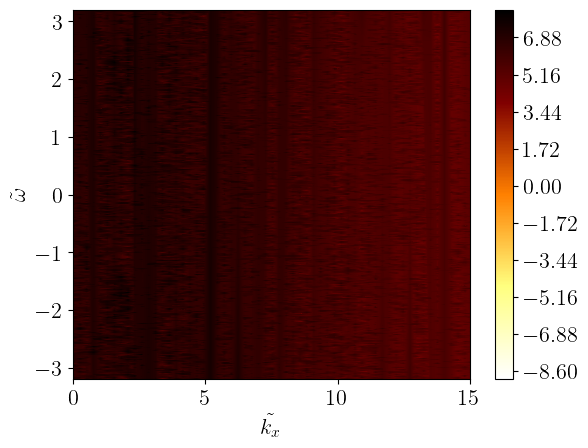

In [ ]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# plt.plot(aa, np.sqrt(mode.gz*aa), 'k')
# plt.plot(aa, np.sqrt(mode.gz*aa*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde), 'k')
# plt.plot(k_tilde, mode.cs_d*k_tilde, 'k')
# plt.plot(k_tilde, mode.cs_u*k_tilde, 'k')
# plt.xlim(-2*np.pi,2*np.pi)
# plt.ylim(-2*np.pi,2*np.pi)
# plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.xlim(0,15)
# plt.savefig('k_om.png')
plt.show()

In [ ]:
tt = yaver.t
len(tt)

1254

In [ ]:
indx_sat_d = np.argmin(np.abs(tt-1000))
indx_sat_u = -1
indx_sat_u

-1

In [ ]:
sat_len = uz_real[indx_sat_d:indx_sat_u,:,225].shape[0]
sat_len

1243

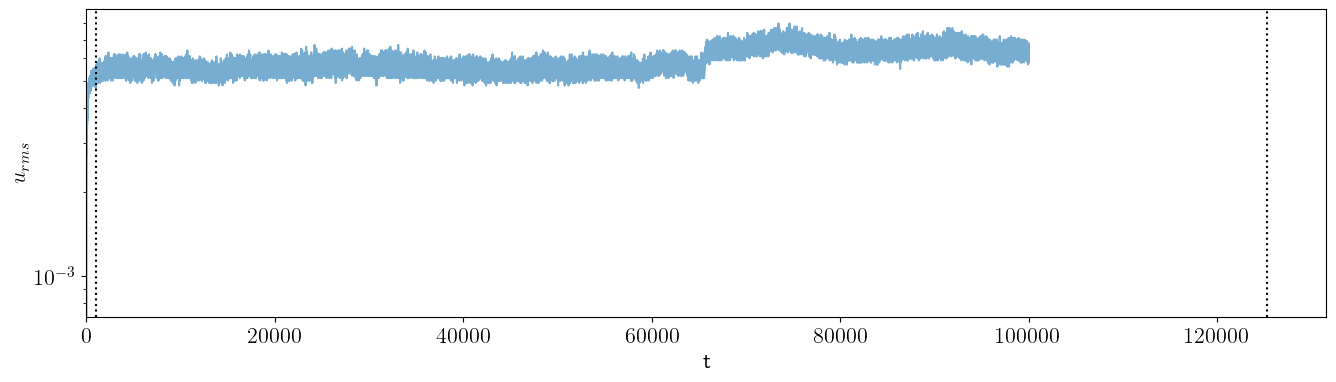

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
plt.axvline(x=yaver.t[indx_sat_u], c='k', ls=':')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [ ]:
uz_fourier_sat = mode.FT(uz_real[indx_sat_d:indx_sat_u,:,225], 'ortho')
logP_sat = mode.logP(uz_fourier_sat, mode.d)
om_tilde_sat = mode.omega_tilde(yaver.t, indx_sat_d, indx_sat_u)

In [ ]:
indx_k_1 = np.argmin(np.abs(k_tilde - 0))

### finding $\tilde{P}(\tilde{\omega},\tilde{k}_x=2)$

In [ ]:
indx_k_1 = np.argmin(np.abs(k_tilde - 2))
k_1 = round(k_tilde[indx_k_1],3)

In [ ]:
k_1

2.08

In [ ]:
k_tilde[indx_k_1]

2.0800001016894365

In [ ]:
indx_sat = mode.upto(yaver.t, indx_sat_d, indx_sat_u)

In [ ]:
P_k1_sat = np.exp(logP_sat[:indx_sat,indx_k_1])

### plotting $\tilde{P}(\tilde{\omega},\tilde{k}_x=2.36)$ as a function of $\tilde{\omega}$

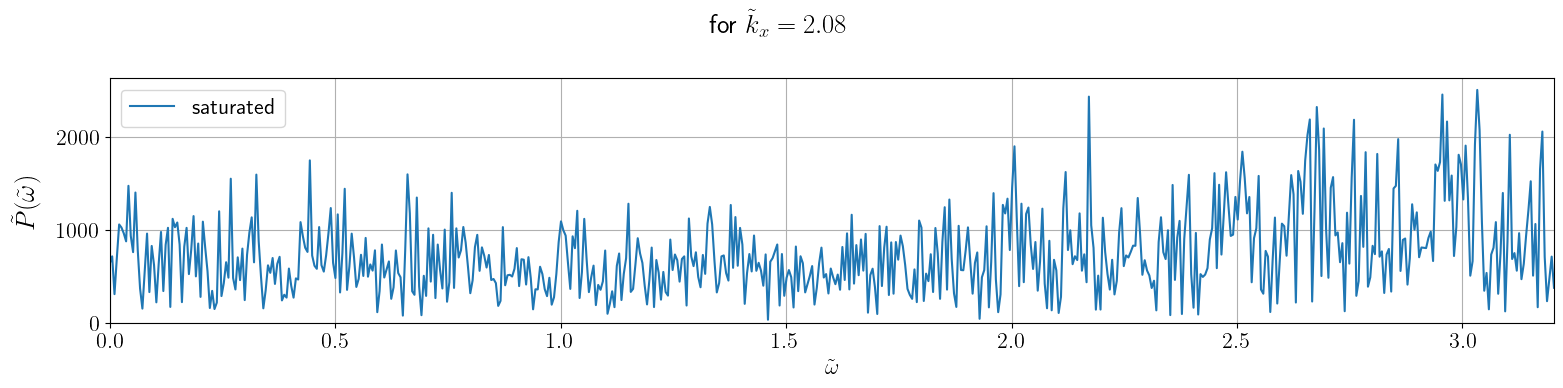

In [ ]:
fig, axs = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,4))#sharex=True,

axs.plot(om_tilde_sat[:indx_sat], P_k1_sat[:], label='saturated')
axs.grid()
axs.set_xlim(0, om_tilde_sat[indx_sat-1])
axs.set_ylim(0,)
axs.legend()

# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

### smoothing data

In [ ]:
mode.L0, mode.q

(1.04, 0.10399306712885809)

In [ ]:
P_k1_sat_filt = gaussian_filter(P_k1_sat[:indx_sat],3)

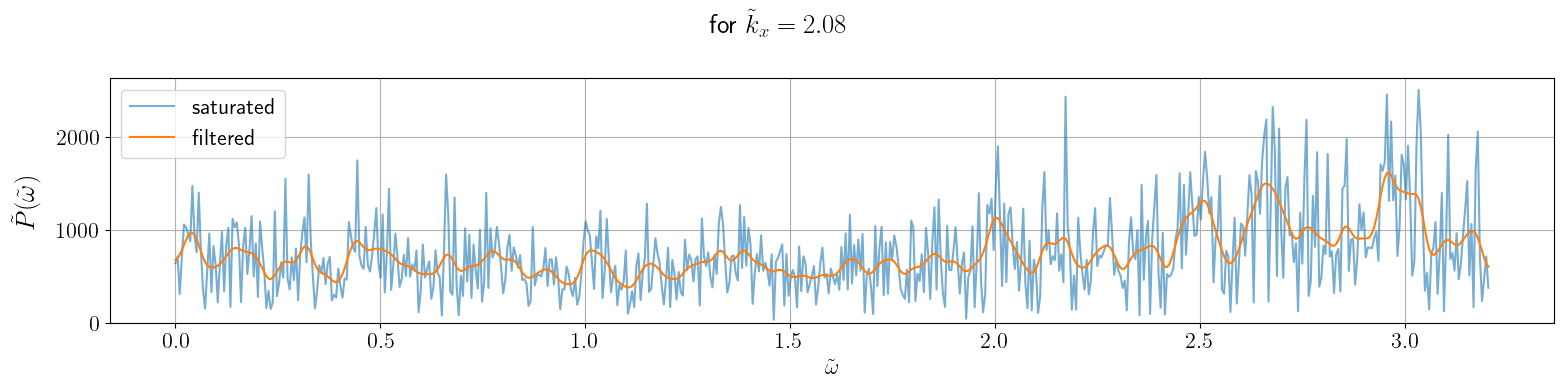

In [ ]:
fig, axs = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,4))#sharex=True,

axs.plot(om_tilde_sat[:indx_sat], P_k1_sat, alpha=0.6, label='saturated')
axs.plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, label='filtered')
axs.grid()
# axs.set_xlim(0, om_tilde_sat[indx_sat-1])
axs.set_ylim(0,)
axs.legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

In [ ]:
mode.q

0.10399306712885809

In [ ]:
f_om = round(mode.fmodes(k_1),3)
p_om_0 = round(mode.pmodes(k_1,0),3)
p_om_1 = round(mode.pmodes(k_1,1),3)
p_om_2 = round(mode.pmodes(k_1,2),3)
p_om_3 = round(mode.pmodes(k_1,3),3)
p_om_4 = round(mode.pmodes(k_1,4),3)
p_om = []
for i in range(5):
    exec(f'p_om.append(p_om_{i})')

In [ ]:
mode.pmodes_test(k_1,0)

2.203228991668184

In [ ]:
mode.pmodes(k_1,0)

2.2175988047022934

In [ ]:
display(Latex(fr'$\omega_f$ = {f_om}'))
display(Latex(fr'$\omega_{{p0}}$ = {p_om_0}'))
display(Latex(fr'$\omega_{{p1}}$ = {p_om_1}'))
display(Latex(fr'$\omega_{{p2}}$ = {p_om_2}'))
display(Latex(fr'$\omega_{{p3}}$ = {p_om_3}'))
display(Latex(fr'$\omega_{{p4}}$ = {p_om_4}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
mode.omega0, mode.gz, mode.cs_d

(0.98, 1.0, 1.02)

In [ ]:
mode.cs_d, mode.gz

(1.02, 1.0)

In [ ]:
mode.lz

3.14160013

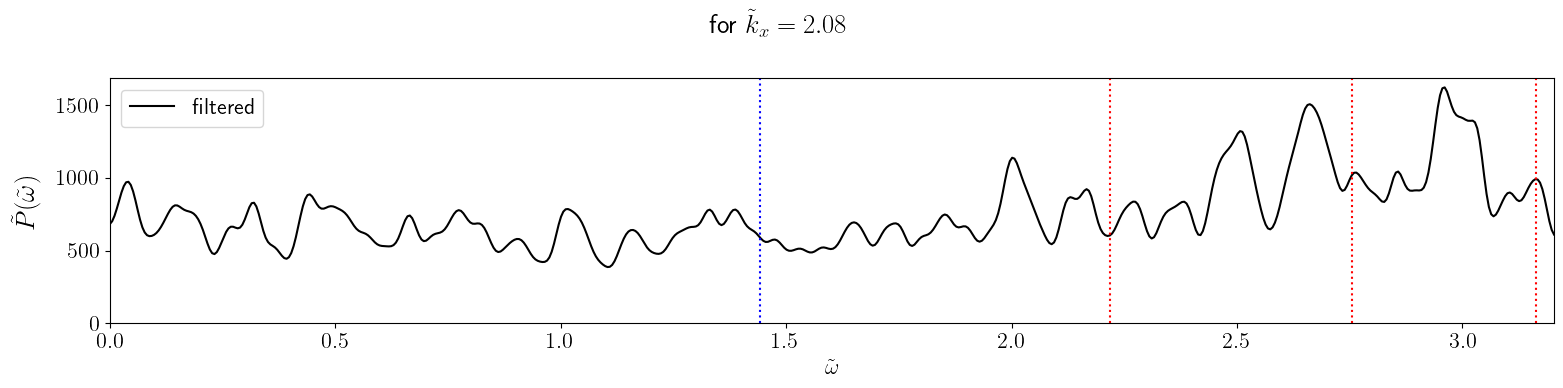

In [ ]:
fig, axs = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,4))#sharex=True,

# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat, c='k', alpha=0.4, label='saturated')
axs.plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, c='k', label='filtered')
axs.axvline(x=f_om, ls=':', c='b')
for i in range(5):
    axs.axvline(x=p_om[i], ls=':', c='r')
# axs[1].grid()
axs.axvline(x=mode.cs_u, ls=':', c='r')
axs.set_xlim(0, om_tilde_sat[indx_sat-1])
axs.set_ylim(0,)
axs.legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
#plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
mode.cs_u

3.163

## P-modes

### fitting

In [ ]:
def lorentzian(x, a, b, c, d, e):
    y = a/((x-b)**2+np.exp(c))+d+e*x
    return y

index of p-modes

In [ ]:
index_sat = mode.mode_finder(om_tilde_sat[:indx_sat], P_k1_sat, False, thres=0.2, min_dist=200)
mode_index_sat = np.array([])
for i in range(len(index_sat)):
    if index_sat[i]<80:
        mode_index_sat = np.delete(index_sat, i)

lb_sat = [130, 130, 130, 130, 120]
ub_sat = [130, 130, 130, 130, 120]

indx_list_sat = []
om_mode_sat = []
for i in range(0,len(mode_index_sat)-2):
    indx_list_sat.append(mode.mode_indx(mode_index_sat[i], lb_sat[i], ub_sat[i]))
    om_mode_sat.append(om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']])
# lb[0], lb[-1], mode_index

In [ ]:
mode_index_sat

array([], dtype=float64)

In [ ]:
p_mode_sat = []
for i in range(len(mode_index_sat)-2):
    p_mode_sat.append(mode.mode_data(P_k1_sat, om_tilde_sat[:indx_sat], indx_list_sat[i]))

IndexError: list index out of range

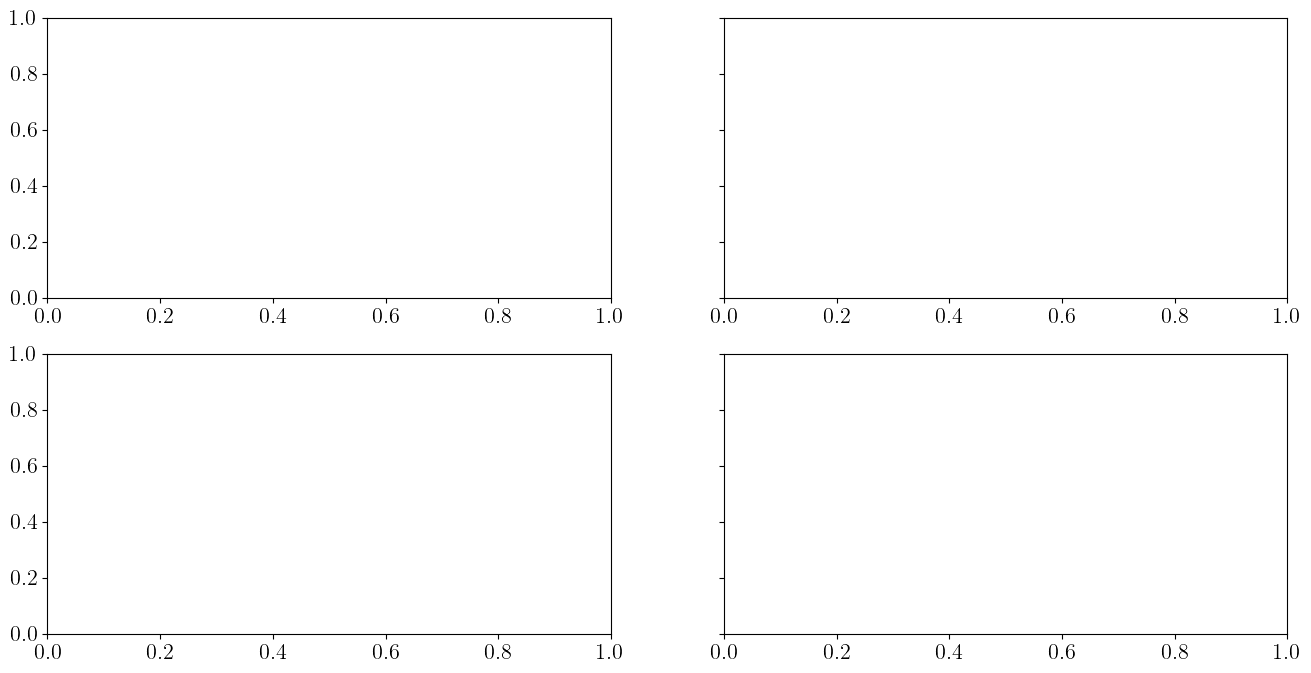

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(16,8))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
# axs[0,0].axvline(x = om_tilde_sat[mode_index_sat[1]])
axs[0,0].legend()
axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].legend()
axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].legend()
axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].legend()

plt.suptitle('p-modes for satetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [ ]:
sig_sat = []
sig_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    sig_sat.append(mode.sigma(p_mode_sat[i]['y'], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']]))
    sig_sat_p.append(sig_sat[i]*np.ones(len(p_mode_sat[i]['y'])))

In [ ]:
p0_sat = []
fitted_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    p0_sat.append(np.array([2,om_tilde_sat[mode_index_sat[i]],-2,100,0.1]))
    fitted_sat_p.append(mode.mode_fit(lorentzian,om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']],p_mode_sat[i]['y'],True, p0=p0_sat[i]))

In [ ]:
p_mode_om_sat = []
for i in range(0,len(mode_index_sat)-1):
    p_mode_om_sat.append(round(om_tilde_sat[mode_index_sat[i]],3))

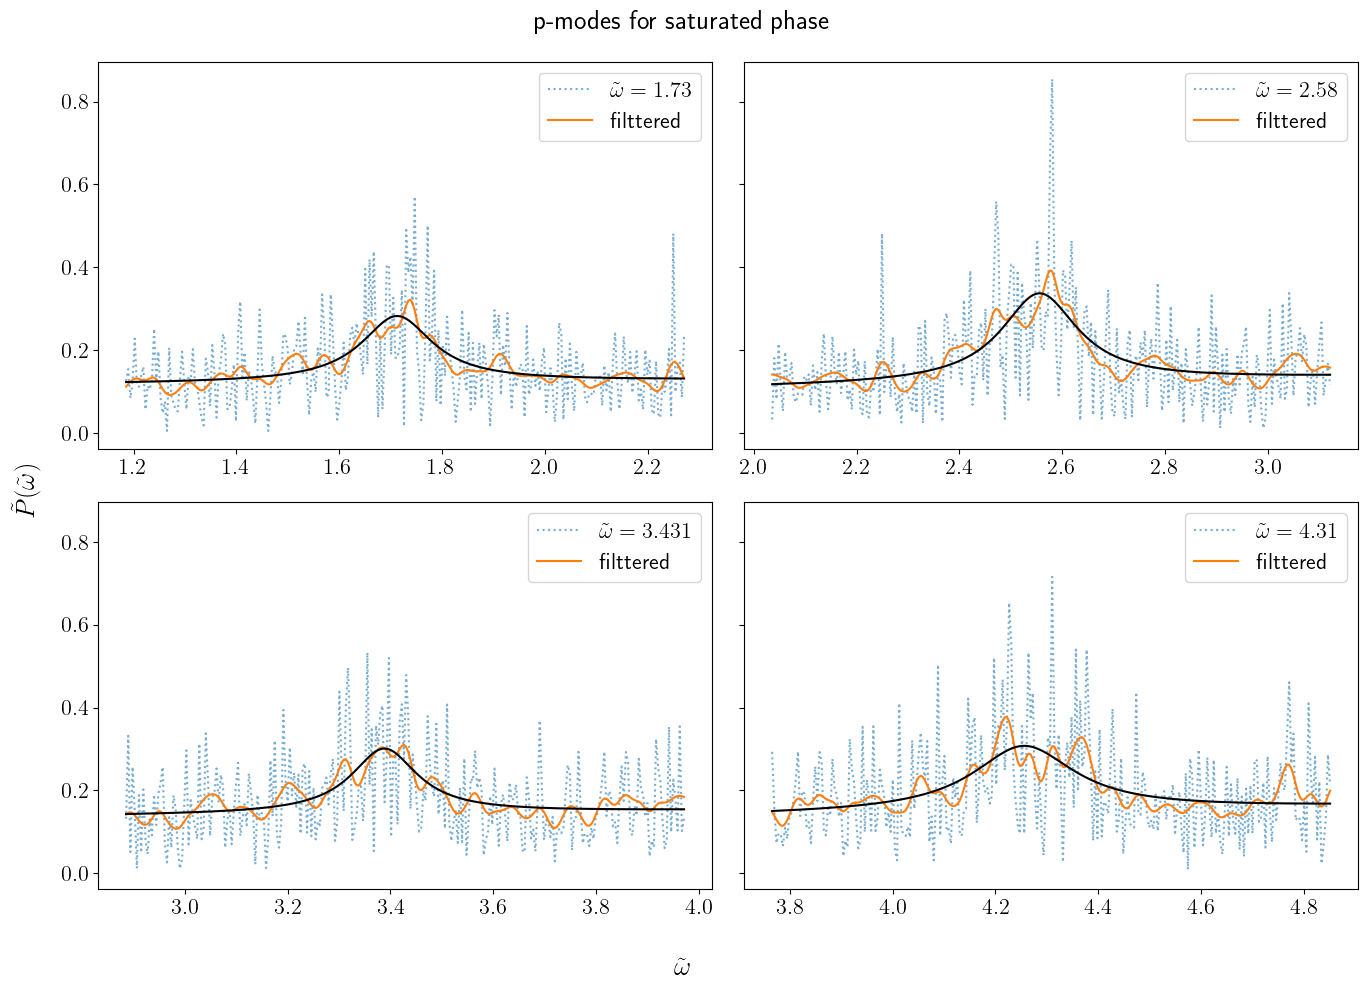

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
axs[0,0].plot(om_mode_sat[i], fitted_sat_p[i], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,0].legend()

axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].plot(om_mode_sat[i+1], fitted_sat_p[i+1], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,1].legend()

axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].plot(om_mode_sat[i+2], fitted_sat_p[i+2], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,0].legend()

axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].plot(om_mode_sat[i+3], fitted_sat_p[i+3], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

## $k_x$ vs. mode parameters

In [ ]:
indx_k = [1,2,3,4,5]

### frequencies of f-modes for different $k_x$

In [ ]:
f_mode_om = []
for i in range(len(indx_k)):
    f_mode_om.append(round(mode.fmodes(round(k_tilde[indx_k[i]],3)),3))

### frequencies of p-modes for different $k_x$

In [ ]:
p_mode_om = np.empty([len(indx_k),3])

for i in range(len(indx_k)):
    for j in range(3):
        p_mode_om[i,j] = round(mode.pmodes(k_tilde[indx_k[i]],j),3)

In [ ]:
p_mode_om.shape

(5, 3)

In [ ]:
P_k_kin = []
P_k_sat = []

P_k_kin_filt = []
P_k_sat_filt = []

for i in range(len(indx_k)):
    P_k_kin.append(np.exp(logP_kin[:indx_kin,indx_k[i]]))
    P_k_sat.append(np.exp(logP_sat[:indx_sat,indx_k[i]]))
    P_k_kin_filt.append(gaussian_filter(P_k_kin[i],3))
    P_k_sat_filt.append(gaussian_filter(P_k_sat[i],3))

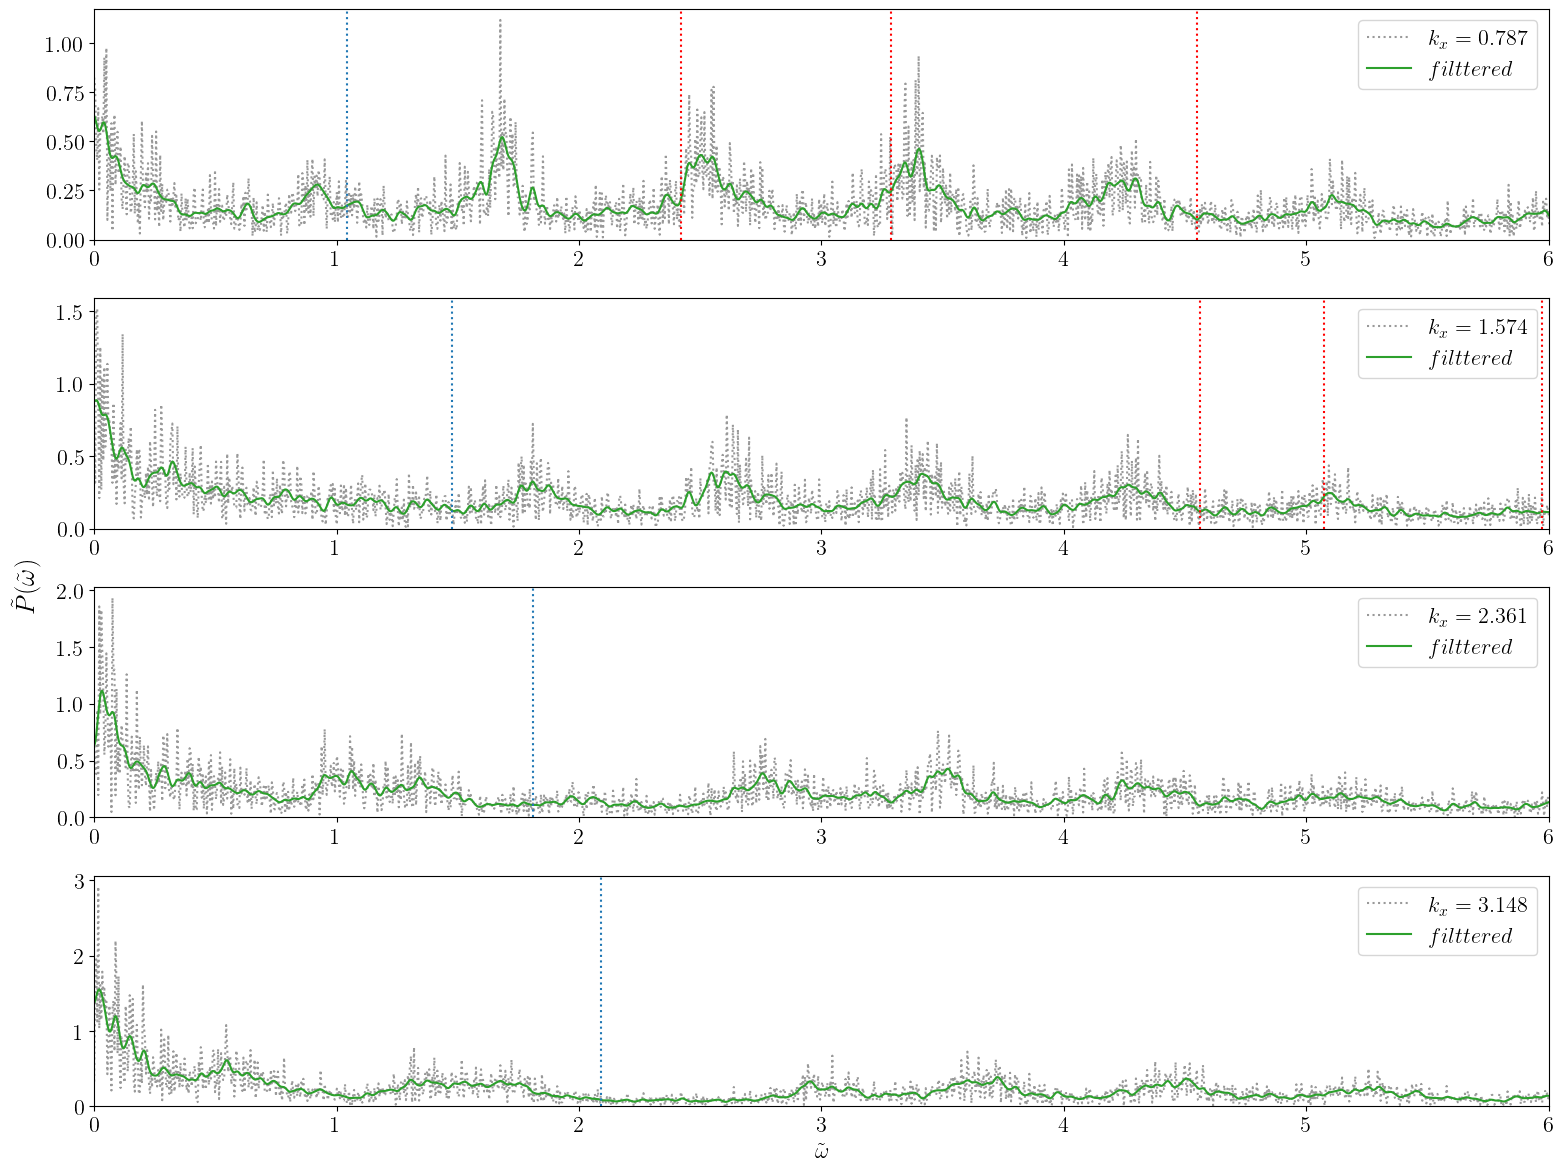

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(16,12))#sharex=True,

axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin[0], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[0], c='C2', label=r'$filttered$')
# axs[0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k', label=r'$fitted$')
axs[0].axvline(x=f_mode_om[0], ls=':')
for i in range(3):
    axs[0].axvline(x=p_mode_om[0,i], c='r', ls=':')
# axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin[1], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[1], c='C2', label=r'$filttered$')
# axs[1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k', label=r'$fitted$')
axs[1].axvline(x=f_mode_om[1], ls=':')
for i in range(3):
    axs[1].axvline(x=p_mode_om[1,i], c='r', ls=':')
# axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin[2], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[2], c='C2', label=r'$filttered$')
# axs[2].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k', label=r'$fitted$')
axs[2].axvline(x=f_mode_om[2], ls=':')
for i in range(3):
    axs[2].axvline(x=p_mode_om[2,i], c='r', ls=':')
# axs[2].grid()
axs[2].set_xlim(0, 6)
axs[2].set_ylim(0,)
axs[2].legend()

axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin[3], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[3], c='C2', label=r'$filttered$')
axs[3].axvline(x=f_mode_om[3], ls=':')
# axs[3].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k', label=r'$fitted$')
for i in range(3):
    axs[3].axvline(x=p_mode_om[3,i], c='r', ls=':')
# axs[3].grid()
axs[3].set_xlim(0, 6)
axs[3].set_ylim(0,)
axs[3].legend()


# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

In [ ]:
f_om

1.044